# COVID-19 State Data

In [104]:
# La problematique métier : il est demandé d'identifier quel(s) facteur(s) influence le décés des personnes atteintes du covid-19

In [85]:
#import of librairies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
print('Libs loaded with success !')

Libs loaded with success !


# Step1 - Retrieving the data set 

In [86]:
states = pd.read_csv('./Data/COVID19_state.csv');

# Step 2 - Getting infos

In [87]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                51 non-null     object 
 1   Tested               51 non-null     int64  
 2   Infected             51 non-null     int64  
 3   Deaths               51 non-null     int64  
 4   Population           51 non-null     int64  
 5   Pop Density          51 non-null     float64
 6   Gini                 51 non-null     float64
 7   ICU Beds             51 non-null     int64  
 8   Income               51 non-null     int64  
 9   GDP                  51 non-null     int64  
 10  Unemployment         51 non-null     float64
 11  Sex Ratio            51 non-null     float64
 12  Smoking Rate         51 non-null     float64
 13  Flu Deaths           51 non-null     float64
 14  Respiratory Deaths   51 non-null     float64
 15  Physicians           51 non-null     int64

In [88]:
stateCorr = states.iloc[:,-15:].corr(); stateCorr

,Sex Ratio,Smoking Rate,Flu Deaths,Respiratory Deaths,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+
Sex Ratio,1.000000,-0.075220,-0.150813,0.074163,-0.234541,-0.110359,-0.037857,-0.381696,-0.092927,-0.650249,-0.196080,0.350469,-0.297696,-0.118238
Smoking Rate,-0.075220,1.000000,0.459029,0.782544,-0.262743,-0.007701,-0.003635,-0.068500,-0.258708,0.118119,-0.613050,0.045718,-0.312298,0.226318
Flu Deaths,-0.150813,0.459029,1.000000,0.426914,-0.060320,-0.008476,-0.144244,-0.084198,-0.101501,0.326962,-0.303001,0.143214,-0.286500,0.079989
Respiratory Deaths,0.074163,0.782544,0.426914,1.000000,-0.299129,0.022939,-0.347737,-0.035793,-0.270746,0.127467,-0.634858,0.222900,-0.465228,0.192187
Physicians,-0.234541,-0.262743,-0.060320,-0.299129,1.000000,0.770096,-0.057821,0.525119,0.851319,0.232246,0.443739,-0.047444,0.237321,-0.158354
Hospitals,-0.110359,-0.007701,-0.008476,0.022939,0.770096,1.000000,-0.309285,0.483858,0.780766,0.376472,0.218999,0.244500,0.061696,-0.285667
Health Spending,-0.037857,-0.003635,-0.144244,-0.347737,-0.057821,-0.309285,1.000000,-0.238962,-0.196425,-0.491829,-0.075022,-0.514113,0.308054,0.238377
Pollution,-0.381696,-0.068500,-0.084198,-0.035793,0.525119,0.483858,-0.238962,1.000000,0.479477,0.404531,0.492111,0.170296,0.404735,-0.409100
Med-Large Airports,-0.092927,-0.258708,-0.101501,-0.270746,0.851319,0.780766,-0.196425,0.479477,1.000000,0.370082,0.438104,0.025658,0.190026,-0.172498
Temperature,-0.650249,0.118119,0.326962,0.127467,0.232246,0.376472,-0.491829,0.404531,0.370082,1.000000,0.233079,0.070284,0.021888,-0.070813


In [89]:
# nous recuperons une preview de notre dataframe pour identifier les colones
states.tail()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
46,Vermont,415518,2219,58,628061,68.1416,0.4539,94,53598,53523,...,14,10190,5.1,0.0,42.9,38.9,0.27,0.36,0.36,03/18/20
47,Washington,2469146,108315,2366,7797095,117.3272,0.4591,1265,60781,74182,...,92,7913,8.0,1.0,48.3,84.1,0.31,0.40,0.29,03/17/20
48,Wisconsin,3327915,244928,2113,5851754,108.0497,0.4498,1159,50756,57720,...,133,8702,6.8,1.0,43.1,70.2,0.32,0.37,0.31,03/18/20
49,West Virginia,794491,25235,458,1778070,73.9691,0.4711,653,40578,43053,...,56,9462,7.6,0.0,51.8,48.7,0.29,0.36,0.35,03/16/20
50,Wyoming,134018,14167,87,567025,5.8400,0.4360,102,60095,69900,...,29,8320,5.0,0.0,42.0,64.8,0.32,0.36,0.31,03/20/20


In [90]:
states.columns

Index(['State', 'Tested', 'Infected', 'Deaths', 'Population', 'Pop Density',
       'Gini', 'ICU Beds', 'Income', 'GDP', 'Unemployment', 'Sex Ratio',
       'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths', 'Physicians',
       'Hospitals', 'Health Spending', 'Pollution', 'Med-Large Airports',
       'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+',
       'School Closure Date'],
      dtype='object')

In [100]:
states = states.iloc[: , :-1]; states

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,Sex Ratio,Smoking Rate,Flu Deaths
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,5.8,1.054688,21.0,12.1
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,2.7,0.930145,20.9,21.4
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,3.5,0.956630,22.3,18.0
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,4.5,0.966965,15.6,12.4
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,3.9,0.975113,11.3,15.6
5,Colorado,2034795,109910,2105,5845526,56.4011,0.4586,1597,56846,63882,2.5,0.994850,14.6,9.7
6,Connecticut,2367994,73858,4627,3563077,735.8689,0.4945,674,74561,76342,3.8,0.947106,12.7,14.8
7,District of Columbia,528174,17438,647,720687,11814.5410,0.5420,314,47285,200277,5.2,0.888570,14.3,11.2
8,Delaware,565983,25311,710,982895,504.3073,0.4522,186,51449,77253,3.9,0.926194,17.0,13.1
9,Florida,10126764,801371,17043,21992985,410.1256,0.4852,5604,49417,48318,2.8,0.942213,16.1,9.6


In [101]:
states.corr()

,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,Sex Ratio,Smoking Rate,Flu Deaths
Tested,1.000000,0.877429,0.887963,0.917761,-0.046610,0.446967,0.886886,0.369927,0.101752,0.011016,-0.202278,-0.282789,-0.042702
Infected,0.877429,1.000000,0.844120,0.957623,-0.087721,0.389080,0.962232,0.111118,-0.031174,-0.021688,-0.201121,-0.186406,-0.078609
Deaths,0.887963,0.844120,1.000000,0.842214,-0.023913,0.522758,0.840416,0.374086,0.086756,0.059856,-0.294413,-0.242660,-0.060009
Population,0.917761,0.957623,0.842214,1.000000,-0.082282,0.380073,0.978022,0.216398,0.018147,0.021802,-0.179096,-0.237066,-0.099613
Pop Density,-0.046610,-0.087721,-0.023913,-0.082282,1.000000,0.506948,-0.079125,0.019956,0.898326,0.284099,-0.401153,-0.174545,-0.174945
Gini,0.446967,0.389080,0.522758,0.380073,0.506948,1.000000,0.414981,0.000428,0.390454,0.311418,-0.711993,0.075545,0.084902
ICU Beds,0.886886,0.962232,0.840416,0.978022,-0.079125,0.414981,1.000000,0.132944,-0.018564,0.031786,-0.232663,-0.117508,-0.063227
Income,0.369927,0.111118,0.374086,0.216398,0.019956,0.000428,0.132944,1.000000,0.362317,-0.138739,0.132090,-0.563845,-0.227107
GDP,0.101752,-0.031174,0.086756,0.018147,0.898326,0.390454,-0.018564,0.362317,1.000000,0.217973,-0.212180,-0.355842,-0.225668
Unemployment,0.011016,-0.021688,0.059856,0.021802,0.284099,0.311418,0.031786,-0.138739,0.217973,1.000000,-0.143195,0.378576,0.152348


In [102]:
states.corr?

# Correlation Heatmap

<AxesSubplot:>

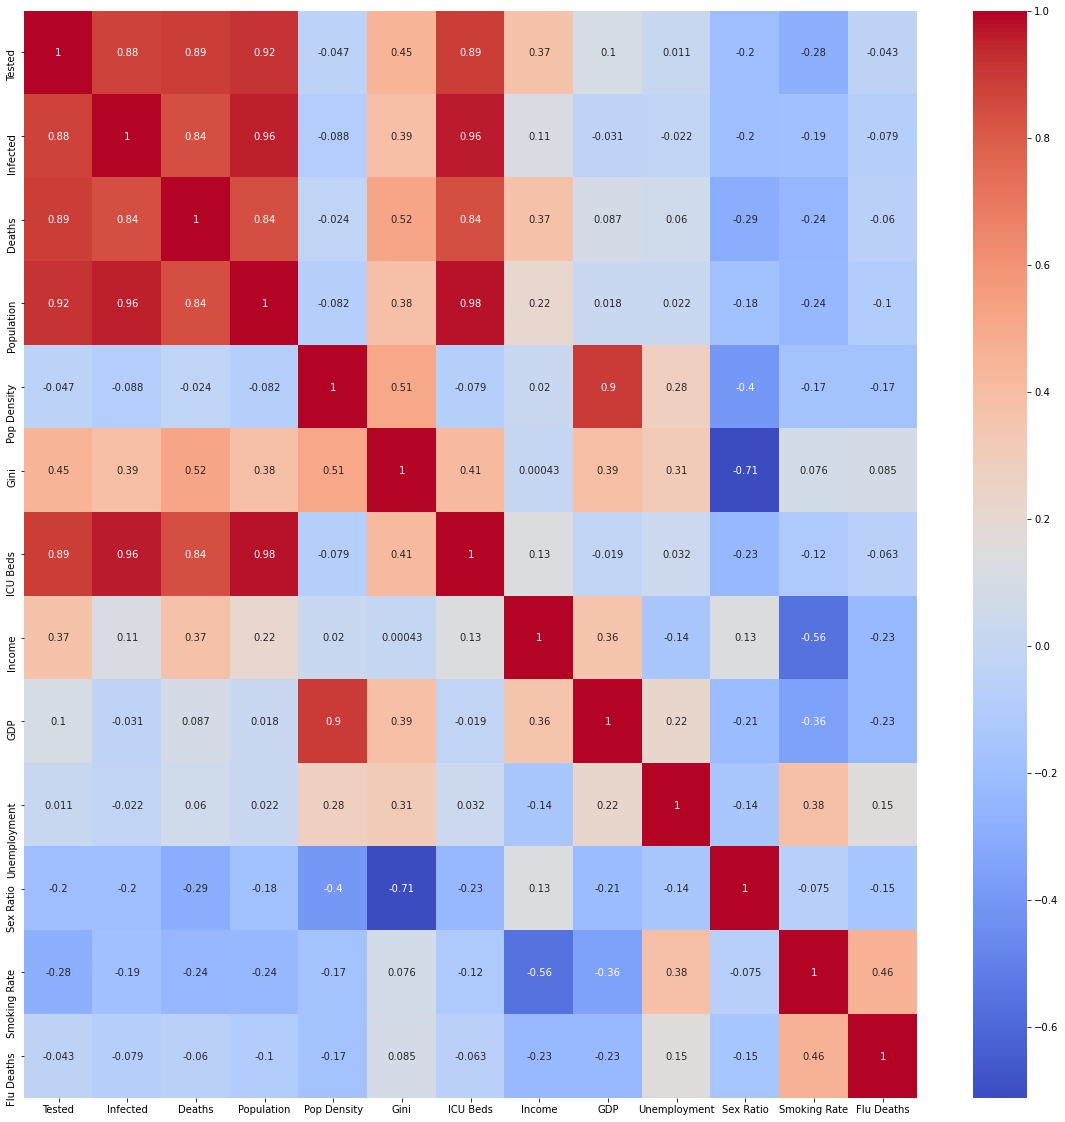

In [103]:
plt.figure(figsize=(20,20))
sns.heatmap(states.corr(), annot=True, cmap="coolwarm")